# Basic OLS Model Using PCA

In [1]:
import pandas as pd
import numpy as np
import sklearn.metrics as metrics
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA

## Pull in Data

In [3]:
onedrive_path = "C:/Users/cfowle/The Estée Lauder Companies Inc/TeamAnis - General/"

In [4]:
reviews = pd.read_csv(onedrive_path + "Data/Ratings and Reviews/reviews_demand_itemid4.csv")
cc      = pd.read_csv(onedrive_path + "Data/Consumer Care/cc_product_month.csv")

## Take a Gander at it

In [5]:
reviews.describe()

,avg_nb_statements,nb_reviews,rating,rating_1,rating_2,rating_3,rating_4,rating_5,sentiment_negative,sentiment_neutral,sentiment_positive,sentiment,demand,demand_1,demand_2,demand_3
count,64331.000000,64331.000000,64331.000000,64331.000000,64331.000000,64331.000000,64331.000000,64331.000000,64331.000000,64331.000000,64331.000000,64331.000000,6.433100e+04,6.433100e+04,6.433100e+04,6.433100e+04
mean,3.738738,15.181390,4.307262,0.833595,0.634375,1.028198,2.149337,10.535885,0.849569,2.140724,12.191096,0.731698,2.394056e+04,2.446187e+04,2.458022e+04,2.489434e+04
std,1.559079,46.230161,0.872739,2.261402,2.518982,5.960960,11.491830,27.686277,3.188785,6.250438,37.341742,0.261796,1.432225e+05,1.452580e+05,1.469601e+05,1.516130e+05
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.750000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.166667,1.600000,0.638889,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.500000,5.000000,4.566667,0.000000,0.000000,0.000000,0.000000,4.000000,0.250000,0.750000,4.166667,0.777083,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.500000,15.000000,5.000000,1.000000,1.000000,1.000000,2.000000,11.000000,0.900000,2.272222,12.269625,0.906250,5.934000e+03,6.156000e+03,6.090000e+03,6.063500e+03
max,22.000000,6201.000000,5.000000,143.000000,264.000000,677.000000,1744.000000,3738.000000,301.061277,706.178695,5208.966002,1.000000,7.026132e+06,8.540640e+06,7.117200e+06,8.540640e+06


In [6]:
reviews

,brand,elc_brand,itemid_4,date,avg_nb_statements,nb_reviews,rating,rating_1,rating_2,rating_3,rating_4,rating_5,sentiment_negative,sentiment_neutral,sentiment_positive,sentiment,demand,demand_1,demand_2,demand_3
0,AR,Aramis,2044,2020-01,3.000000,1,5.000000,0,0,0,0,1,0.000000,0.333333,0.666667,0.666667,522,1605.0,1152.0,237.0
1,AR,Aramis,2EC6,2015-05,2.000000,1,5.000000,0,0,0,0,1,0.000000,0.000000,1.000000,1.000000,3787,3696.0,4538.0,1868.0
2,AR,Aramis,2EC6,2016-02,1.500000,2,5.000000,0,0,0,0,2,0.000000,0.000000,2.000000,1.000000,2649,2646.0,4223.0,5674.0
3,AR,Aramis,2EC6,2018-04,2.000000,2,1.000000,2,0,0,0,0,0.000000,1.000000,1.000000,0.500000,2444,1759.0,5221.0,16808.0
4,AR,Aramis,2EC8,2019-06,2.000000,1,1.000000,1,0,0,0,0,0.000000,1.000000,0.000000,0.000000,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64326,TF,Tom Ford Beauty,T8FG,2019-11,1.500000,2,5.000000,0,0,0,0,2,0.000000,0.000000,2.000000,1.000000,0,0.0,0.0,0.0
64327,TF,Tom Ford Beauty,T8N5,2019-09,4.000000,1,5.000000,0,0,0,0,1,0.000000,0.000000,1.000000,1.000000,0,0.0,0.0,0.0
64328,TF,Tom Ford Beauty,T8N5,2020-01,8.000000,3,4.250000,0,0,0,2,1,0.111111,0.507937,2.380952,0.706349,0,0.0,0.0,0.0
64329,TF,Tom Ford Beauty,T8N5,2020-02,4.333333,7,2.333333,6,0,0,0,1,1.633333,0.333333,5.033333,0.600000,0,0.0,0.0,0.0


In [7]:
cc.describe()

,Complaints,Compliments,Questions,Suggestions,Complaints_Availability_GBNF,Complaints_Availability_Location,Complaints_Availability_Product Availability,Complaints_Corporate_ELC,Complaints_Corporate_Environmental,Complaints_Corporate_Pricing,...,Questions_Order_Returns,Questions_Product_General,Questions_Product_Packaging,Questions_Product_Performance,Questions_Product_Usage Related,Questions_Service_Location,Questions_Service_Miscellaneous,Questions_Website_Offer Codes,Questions_Website_Website functionality,Suggestions_Suggestion_Miscellaneous
count,112553.000000,112553.000000,112553.000000,112553.000000,112553.000000,112553.000000,112553.000000,112553.0,112553.000000,112553.000000,...,112553.000000,112553.000000,112553.000000,112553.000000,112553.000000,112553.000000,112553.000000,112553.000000,112553.000000,112553.000000
mean,1.401917,0.028227,0.618597,0.003190,0.171244,0.001475,0.320738,0.0,0.000080,0.003092,...,0.002879,0.006441,0.042496,0.000347,0.012039,0.002674,0.032785,0.000107,0.001599,0.003190
std,2.009311,0.282452,1.260957,0.056857,0.545869,0.039516,1.069271,0.0,0.008942,0.058480,...,0.058187,0.084955,0.247019,0.019543,0.113686,0.052328,0.214178,0.010325,0.041271,0.056857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,95.000000,18.000000,44.000000,2.000000,17.000000,2.000000,66.000000,0.0,1.000000,2.000000,...,4.000000,4.000000,13.000000,2.000000,4.000000,2.000000,16.000000,1.000000,2.000000,2.000000


In [8]:
cc

,Product Code,P4,Brand Clean,Date Month,Complaints,Compliments,Questions,Suggestions,Complaints_Availability_GBNF,Complaints_Availability_Location,...,Questions_Order_Returns,Questions_Product_General,Questions_Product_Packaging,Questions_Product_Performance,Questions_Product_Usage Related,Questions_Service_Location,Questions_Service_Miscellaneous,Questions_Website_Offer Codes,Questions_Website_Website functionality,Suggestions_Suggestion_Miscellaneous
0,000P010000,000P,Origins,2019-03,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,000P010000,000P,Origins,2019-06,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,000P010000 1860,000P,Origins,2017-10,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,000P010000 1860,000P,Origins,2018-06,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,000P010000 1860,000P,Origins,2018-10,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112548,ZYAC010000 1530,ZYAC,Clinique,2018-03,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112549,ZYAC010000 1530,ZYAC,Clinique,2018-05,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112550,ZYAC010000 1530,ZYAC,Clinique,2018-08,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
112551,ZYAE010000 1530,ZYAE,Clinique,2018-02,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Merge Data

In [9]:
cc = cc.rename(columns = {"Date Month": "date", "P4": "itemid_4", "Brand Clean": "elc_brand"})

In [10]:
cc = cc.groupby(["date", "itemid_4", "elc_brand"]).sum().reset_index()

In [11]:
cc_reviews = reviews.merge(cc, how = "left")

In [12]:
print(len(reviews))
print(len(cc_reviews))

64331
64331


## Create Target Encoding

In [13]:
brand_encodings = cc_reviews.groupby("elc_brand")["demand"].mean().reset_index()
brand_encodings = brand_encodings.rename(columns = {"demand": "avg_brand_demand"})

In [14]:
product_encodings = cc_reviews.groupby("itemid_4")["demand"].mean().reset_index()
product_encodings = product_encodings.rename(columns = {"demand": "avg_product_demand"})

In [15]:
cc_reviews = cc_reviews.merge(brand_encodings, how = "left")
cc_reviews = cc_reviews.merge(product_encodings, how = "left")

## Basic Feature Engineering

In [16]:
cc_reviews["month"] = [x[-2:] for x in cc_reviews["date"].values]
cc_reviews["year"] = [x[:4] for x in cc_reviews["date"].values]

In [17]:
cc_reviews

,brand,elc_brand,itemid_4,date,avg_nb_statements,nb_reviews,rating,rating_1,rating_2,rating_3,...,Questions_Product_Usage Related,Questions_Service_Location,Questions_Service_Miscellaneous,Questions_Website_Offer Codes,Questions_Website_Website functionality,Suggestions_Suggestion_Miscellaneous,avg_brand_demand,avg_product_demand,month,year
0,AR,Aramis,2044,2020-01,3.000000,1,5.000000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,657.937500,522.0,01,2020
1,AR,Aramis,2EC6,2015-05,2.000000,1,5.000000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,657.937500,2960.0,05,2015
2,AR,Aramis,2EC6,2016-02,1.500000,2,5.000000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,657.937500,2960.0,02,2016
3,AR,Aramis,2EC6,2018-04,2.000000,2,1.000000,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,657.937500,2960.0,04,2018
4,AR,Aramis,2EC8,2019-06,2.000000,1,1.000000,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,657.937500,0.0,06,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64326,TF,Tom Ford Beauty,T8FG,2019-11,1.500000,2,5.000000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2164.957391,0.0,11,2019
64327,TF,Tom Ford Beauty,T8N5,2019-09,4.000000,1,5.000000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2164.957391,0.0,09,2019
64328,TF,Tom Ford Beauty,T8N5,2020-01,8.000000,3,4.250000,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2164.957391,0.0,01,2020
64329,TF,Tom Ford Beauty,T8N5,2020-02,4.333333,7,2.333333,6,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2164.957391,0.0,02,2020


## PCA
### Scale Features

In [18]:
# Separating out the features
x = cc_reviews.drop(['brand', 'elc_brand', 'itemid_4', 'date', 'demand'], axis = 1).fillna(0).values
# Separating out the target
y = cc_reviews.loc[:,['demand']]
# Standardizing the features
x = StandardScaler().fit_transform(x)

### Fit Components

Text(0, 0.5, 'cumulative explained variance')

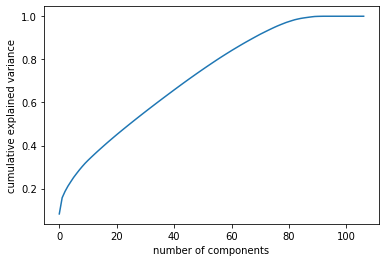

In [19]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [20]:
pca = PCA(n_components=14)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents)

In [21]:
pca.explained_variance_ratio_

array([0.08259012, 0.07507556, 0.02935109, 0.02418104, 0.02069764,
       0.02002706, 0.01744042, 0.01696465, 0.01540117, 0.01447569,
       0.01273924, 0.01230276, 0.011973  , 0.0117163 ])

## Run OLS

In [22]:
X_train, X_test, y_train, y_test =train_test_split(principalDf, y)

In [23]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.766071336449906

In [25]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     8031.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:05:07   Log-Likelihood:            -6.1184e+05
No. Observations:               48248   AIC:                         1.224e+06
Df Residuals:                   48233   BIC:                         1.224e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.397e+04    354.374     67.652      0.0

In [26]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

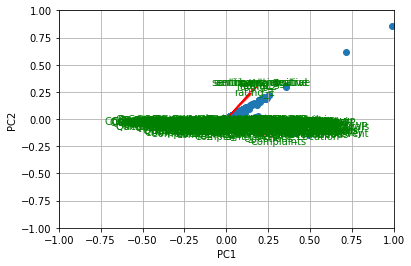

In [27]:
#Call the function. Use only the 2 PCs.
myplot(principalDf.values[:,0:2],np.transpose(pca.components_[0:2, :]), labels = cc_reviews.drop(['brand', 'elc_brand', 'itemid_4', 'date', 'demand'], axis = 1).columns)
plt.show()

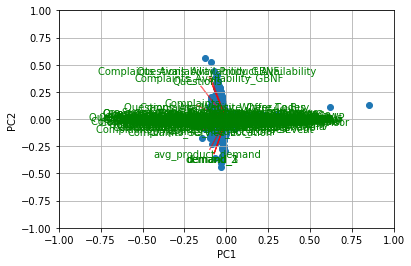

In [28]:
myplot(principalDf.values[:,1:3],np.transpose(pca.components_[1:3, :]), labels = cc_reviews.drop(['brand', 'elc_brand', 'itemid_4', 'date', 'demand'], axis = 1).columns)
plt.show()

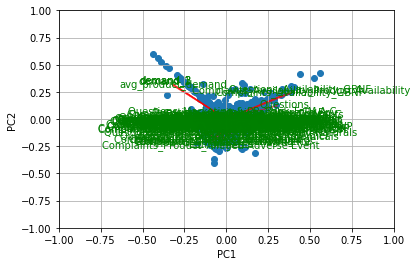

In [29]:
myplot(principalDf.values[:,2:4],np.transpose(pca.components_[2:4, :]), labels = cc_reviews.drop(['brand', 'elc_brand', 'itemid_4', 'date', 'demand'], axis = 1).columns)
plt.show()

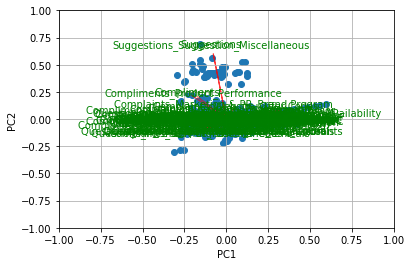

In [30]:
myplot(principalDf.values[:,3:5],np.transpose(pca.components_[3:5, :]), labels = cc_reviews.drop(['brand', 'elc_brand', 'itemid_4', 'date', 'demand'], axis = 1).columns)
plt.show()

In [31]:
for i,x in enumerate(pca.components_):
    print("Feature " + str(i), ", Explains " + str(pca.explained_variance_[i]) + "%")
    top = x.argsort()[-5:][::-1]
    table = [list(cc_reviews.drop(['brand', 'elc_brand', 'itemid_4', 'date', 'demand'], axis = 1).columns[top]), x[top]]
    df = pd.DataFrame(np.transpose(table))
    print(df)

Feature 0 , Explains 8.176548595055927%
                                  0                    1
0                        Complaints  0.27098967183245776
1                         Questions  0.22132762298267933
2       Complaints_Service_Location  0.21427527622927853
3                avg_product_demand    0.208798641577559
4  Complaints_Service_Miscellaneous  0.18704312434990406
Feature 1 , Explains 7.432596224765874%
                    0                    1
0          nb_reviews  0.30183282553315066
1   sentiment_neutral   0.3014955260463793
2  sentiment_positive   0.2978112677736067
3  sentiment_negative  0.29745173157170185
4            rating_4   0.2943851840878465
Feature 2 , Explains 2.9058033457180112%
                                              0                    1
0  Complaints_Availability_Product Availability   0.3872039832076046
1                   Questions_Availability_GBNF    0.385250858050052
2                  Complaints_Availability_GBNF   0.3341684582887549
3  

## Let's try taking out the extra CC data

In [32]:
slimmer = cc_reviews[[ 'avg_brand_demand',
       'avg_product_demand', 'month', 'year','avg_nb_statements',
       'nb_reviews', 'rating', 'rating_1', 'rating_2', 'rating_3',
       'rating_4', 'rating_5', 'sentiment_negative', 'sentiment_neutral',
       'sentiment_positive', 'sentiment', 'demand_1', 'demand_2',
       'demand_3', 'Complaints', 'Compliments', 'Questions', 'Suggestions']]

In [33]:
# Separating out the features
slimmer_x = slimmer.fillna(0).values
# Separating out the target
y = cc_reviews.loc[:,['demand']]
# Standardizing the features
slimmer_x = StandardScaler().fit_transform(slimmer_x)

Text(0, 0.5, 'cumulative explained variance')

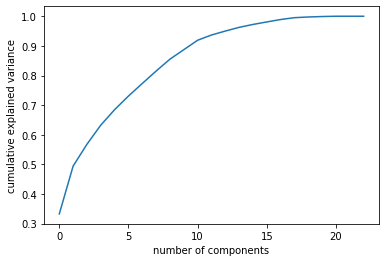

In [34]:
pca = PCA().fit(slimmer_x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [35]:
pca = PCA(n_components=14)
principalComponents = pca.fit_transform(slimmer_x)
principalDf = pd.DataFrame(data = principalComponents)

In [36]:
X_train, X_test, y_train, y_test =train_test_split(principalDf, y)

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)

pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.7536168678235199

In [38]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 demand   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     9612.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:05:15   Log-Likelihood:            -6.0976e+05
No. Observations:               48248   AIC:                         1.220e+06
Df Residuals:                   48233   BIC:                         1.220e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.389e+04    339.445     70.370      0.0

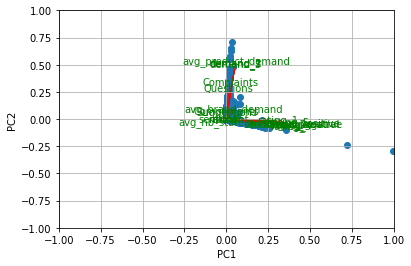

In [39]:
#Call the function. Use only the 2 PCs.
myplot(principalDf.values[:,0:2],np.transpose(pca.components_[0:2, :]), labels = slimmer.columns)
plt.show()

In [40]:
for i,x in enumerate(pca.components_):
    print("Feature " + str(i), ", Explains " + str(pca.explained_variance_[i]) + "%")
    top = x.argsort()[-5:][::-1]
    table = [list(slimmer.columns[top]), x[top]]
    df = pd.DataFrame(np.transpose(table))
    print(df)

Feature 0 , Explains 7.655551761631162%
                    0                    1
0   sentiment_neutral   0.3524687209231502
1          nb_reviews   0.3523814716680687
2  sentiment_positive   0.3476993036223159
3  sentiment_negative  0.34617283104779695
4            rating_4   0.3386077093110344
Feature 1 , Explains 3.7135784311939233%
                    0                    1
0  avg_product_demand  0.46919220115532834
1            demand_2   0.4528159632151622
2            demand_1   0.4509817196413351
3            demand_3    0.445453448121726
4          Complaints  0.29620839187979653
Feature 2 , Explains 1.6966688417448685%
                    0                    1
0              rating   0.6616645948118653
1           sentiment    0.652404623274334
2            rating_5  0.10750107660293683
3  sentiment_positive  0.07914035600562033
4          nb_reviews  0.06390223592601059
Feature 3 , Explains 1.483386704705437%
                    0                    1
0            demand_3

Okay, I think there are a lot of issues with this approach. First, I think we should be predicting the next month's demand and we should also be working with fractions and not counts

Working with the lagged features makes more sense because then when you control with the previous month's demand, you are able to actually use the count values (because we're already controling for the voluming at the time the reviews were produced).

Other thought, Anis mentioned that there was a bit weird variability on the product level, so what if we summarize on the category and product level? Are our results better there?

## For Tomorrow
1. Shift around data so we are predicting this month's demand with last months (or earlier) data
2. Try summarizing on category and a brand level
3. Move features to relative (percentages...maybe normalized?) measures instead of direct measures

## Join with Product Catalog

In [41]:
products = pd.read_csv(onedrive_path + "Data/Product/product_codes.csv")

C:\Users\cfowle\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,12,23,26,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
products = products.rename(columns = {"P4": "itemid_4", "brand": "elc_brand"})
products = products[["elc_brand", "itemid_4", 'Major Category', 'Application', 'Category',
       'SubCategory']].drop_duplicates(["elc_brand", "itemid_4"])

In [43]:
cc_product = cc.merge(products, how = "left", on = ["itemid_4", "elc_brand"])

In [45]:
cc_product.columns

Index(['date', 'itemid_4', 'elc_brand', 'Complaints', 'Compliments',
       'Questions', 'Suggestions', 'Complaints_Availability_GBNF',
       'Complaints_Availability_Location',
       'Complaints_Availability_Product Availability',
       'Complaints_Corporate_ELC', 'Complaints_Corporate_Environmental',
       'Complaints_Corporate_Pricing', 'Complaints_Corporate_Privacy',
       'Complaints_Corporate_Testing',
       'Complaints_Corporate_Unauthorized Account',
       'Complaints_Formula / Ingredients_Formula',
       'Complaints_Marketing & PR_Advertising',
       'Complaints_Marketing & PR_Back To M.A.C',
       'Complaints_Marketing & PR_Brand Program',
       'Complaints_Marketing & PR_Loyalty',
       'Complaints_Marketing & PR_Marketing General',
       'Complaints_Marketing & PR_Promotions/GWP/PWP',
       'Complaints_Order_Availability', 'Complaints_Order_Delivery',
       'Complaints_Order_Options/Status', 'Complaints_Order_Returns',
       'Complaints_Product_Accidental Da

## Group By Subcategory

In [113]:
subcat = cc_product.groupby(["elc_brand", "date", "SubCategory"]).sum().reset_index()

## Join with R&R

In [94]:
rr_forward = pd.read_csv(onedrive_path + "Data/Ratings and Reviews/reviews_demand_subcat.csv")

C:\Users\cfowle\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [95]:
rr_forward = rr_forward.drop(["avg_nb_statements", "rating", "sentiment"], axis = 1)

In [96]:
rr_forward = rr_forward.groupby(["elc_brand", "sub_category", "date"]).sum().reset_index()

In [114]:
subcat = subcat.rename(columns = {"SubCategory": "sub_category"})
subcat = rr_forward.merge(subcat, how = "left", on = ["elc_brand", "sub_category", "date"])

## Create Relative Measures

In [115]:
subcat["percent_1"] = subcat["rating_1"]/subcat["nb_reviews"]
subcat["percent_2"] = subcat["rating_2"]/subcat["nb_reviews"]
subcat["percent_3"] = subcat["rating_3"]/subcat["nb_reviews"]
subcat["percent_4"] = subcat["rating_4"]/subcat["nb_reviews"]
subcat["percent_5"] = subcat["rating_5"]/subcat["nb_reviews"]

In [116]:
subcat["percent_negative"] = subcat['sentiment_negative']/subcat["nb_reviews"]
subcat["percent_neutral"] = subcat['sentiment_neutral']/subcat["nb_reviews"]
subcat["percent_positive"] = subcat['sentiment_positive']/subcat["nb_reviews"]

In [117]:
subcat["cc_tot"] = subcat['Complaints'] + subcat['Compliments'] + subcat['Questions'] + subcat['Suggestions']

In [101]:
rr_forward.columns

Index(['elc_brand', 'sub_category', 'date', 'major_category_id', 'nb_reviews',
       'rating_1', 'rating_2', 'rating_3', 'rating_4', 'rating_5',
       'sentiment_negative', 'sentiment_neutral', 'sentiment_positive',
       'demand_P1', 'demand_P2', 'demand', 'demand_F1', 'demand_F2'],
      dtype='object')

In [118]:
non_cc_cols = ['elc_brand', "sub_category", "date", "major_category_id",'nb_reviews', 'rating_1', 'rating_2',
       'rating_3', 'rating_4', 'rating_5', 'sentiment_negative',
       'sentiment_neutral','percent_1', 'percent_2',
       'percent_3', 'percent_4', 'percent_5', 'sentiment_positive', 'demand_P1', 'demand_P2', 'demand',
       'demand_F1', 'demand_F2', 'percent_negative',
       'percent_neutral', 'percent_positive']
cc_summary = ['Complaints', 'Compliments', 'Questions', 'Suggestions', "cc_tot"]
cc_cats = subcat.drop(non_cc_cols + cc_summary, axis = 1).columns

In [55]:
for col in cc_cats:
    subcat[col + "_percent"] = subcat[col]/subcat["cc_tot"]

In [119]:
percent_cols = []
for col in subcat.columns:
    if(col[-8:] == "_percent" or col[:8] == "percent_"):
        percent_cols.append(col)

In [120]:
subcat_percent = subcat[percent_cols]

In [121]:
all_data = pd.concat([subcat_percent, subcat[['demand_F1','demand_P1', 'demand_P2', 'demand']]], axis = 1).dropna()
y = all_data["demand_F1"]
X = all_data.drop("demand_F1", axis = 1)

## Try Plain Ol'OLS on this

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [123]:
lm = LinearRegression()
lm.fit(X_train, y_train)

pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.7950654003255578

## Let's apply PCA and see what happens

Text(0, 0.5, 'cumulative explained variance')

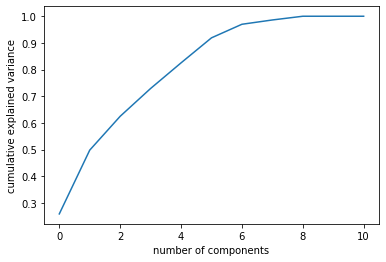

In [124]:
X = StandardScaler().fit_transform(X)
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [135]:
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y)

In [137]:
lm = LinearRegression()
lm.fit(X_train, y_train)

pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.731485782721939

In [138]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train.values.reshape(-1,1), X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     9500.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:15:06   Log-Likelihood:            -1.2957e+05
No. Observations:               10722   AIC:                         2.592e+05
Df Residuals:                   10717   BIC:                         2.592e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.169e+04    413.997     76.557      0.0

In [139]:
for i,x in enumerate(pca.components_):
    print("Feature " + str(i), ", Explains " + str(pca.explained_variance_[i]) + "%")
    top = x.argsort()[-5:][::-1]
    table = [list(all_data.drop("demand_F1", axis = 1).columns[top]), x[top]]
    df = pd.DataFrame(np.transpose(table))
    print(df)

Feature 0 , Explains 2.84755173824461%
                  0                    1
0  percent_positive   0.4703736153493772
1         percent_5   0.4181693245366805
2         demand_P1   0.2504346904675659
3            demand  0.25010316730103715
4         demand_P2  0.24693869424358209
Feature 1 , Explains 2.63070168466023%
                  0                    1
0         demand_P1     0.52284300509075
1         demand_P2   0.5201506671078984
2            demand   0.5182673134973292
3  percent_negative   0.1803426147019297
4         percent_1  0.15289304206710988
Feature 2 , Explains 1.3955632273683576%
                 0                     1
0        percent_5    0.4904156653491523
1  percent_neutral   0.40361004095108566
2        percent_1   0.14982747128448087
3        demand_P1  0.006846814532566302
4           demand  0.006597810920770223
Feature 3 , Explains 1.1472951684919235%
                 0                      1
0  percent_neutral     0.6212081131393137
1        percent_4

Let's just try this with the basic R&R data set and see what happens.

In [70]:
X = rr_forward.drop(["demand_F1", "demand_F2", "elc_brand", "sub_category", "major_category_id", "date"], axis = 1)
y = rr_forward[["demand_F1"]]
X = StandardScaler().fit_transform(X)

Text(0, 0.5, 'cumulative explained variance')

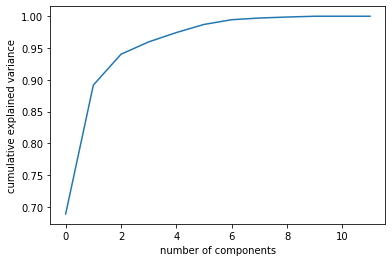

In [71]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [72]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y)

In [74]:
lm = LinearRegression()
lm.fit(X_train, y_train)

pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.8429573420555632

In [75]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train.values.reshape(-1,1), X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                 1.689e+04
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:09:18   Log-Likelihood:            -1.2966e+05
No. Observations:               10722   AIC:                         2.593e+05
Df Residuals:                   10719   BIC:                         2.594e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.197e+04    417.465     76.589      0.0

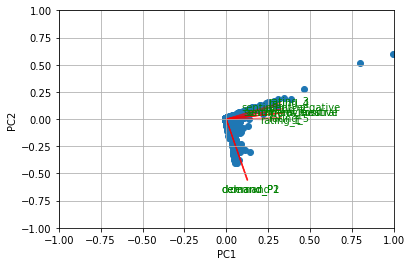

In [77]:
myplot(principalDf.values[:,0:2],np.transpose(pca.components_[0:2, :]), labels = rr_forward.drop(["demand_F1", "demand_F2", "elc_brand", "sub_category", "major_category_id", "date"], axis = 1).columns)
plt.show()

In [79]:
for i,x in enumerate(pca.components_):
    print("Feature " + str(i))
    top = x.argsort()[-5:][::-1]
    table = [list(rr_forward.drop(["demand_F1", "demand_F2", "elc_brand", "sub_category", "major_category_id", "date"], axis = 1).columns[top]), x[top]]
    df = pd.DataFrame(np.transpose(table))
    print(df)

Feature 0
                    0                    1
0   sentiment_neutral    0.341381685389727
1          nb_reviews  0.34040565322425015
2  sentiment_positive   0.3374333999085601
3  sentiment_negative   0.3365517013988688
4            rating_4   0.3258233640164742
Feature 1
                    0                     1
0            rating_3    0.1493886633068455
1            rating_4   0.13183141585847838
2  sentiment_negative   0.09566883629536738
3            rating_2   0.08299955096955129
4          nb_reviews  0.060866716232921274


Let's try adding in the targets

In [80]:
rr_forward = pd.read_csv(onedrive_path + "Data/Ratings and Reviews/reviews_demand_subcat.csv")
rr_forward = rr_forward.groupby(["elc_brand", "sub_category", "date"]).sum().reset_index()

C:\Users\cfowle\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [81]:
rr_forward["year"] = [int(x[:4]) for x in rr_forward["date"].values]
rr_forward["month"] = [int(x[-2:]) for x in rr_forward["date"].values]

brand_map = rr_forward.groupby("elc_brand")["demand_F1"].mean().reset_index().rename(columns = {"demand_F1": "avg_brand_demand"})
year_map  = rr_forward.groupby("year")["demand_F1"].mean().reset_index().rename(columns = {"demand_F1": "avg_year_demand"})
month_map = rr_forward.groupby("month")["demand_F1"].mean().reset_index().rename(columns = {"demand_F1": "avg_month_demand"})
sub_map   = rr_forward.groupby("sub_category")["demand_F1"].mean().reset_index().rename(columns = {"demand_F1": "avg_sub_demand"})

In [82]:
rr_forward = rr_forward.merge(brand_map).merge(year_map).merge(month_map).merge(sub_map)

In [83]:
rr_forward.columns

Index(['elc_brand', 'sub_category', 'date', 'major_category_id',
       'avg_nb_statements', 'nb_reviews', 'rating', 'rating_1', 'rating_2',
       'rating_3', 'rating_4', 'rating_5', 'sentiment_negative',
       'sentiment_neutral', 'sentiment_positive', 'sentiment', 'demand_P1',
       'demand_P2', 'demand', 'demand_F1', 'demand_F2', 'year', 'month',
       'avg_brand_demand', 'avg_year_demand', 'avg_month_demand',
       'avg_sub_demand'],
      dtype='object')

In [84]:
modelling = rr_forward.drop(["elc_brand", 'sub_category', 'date', 'demand_F2', 'major_category_id'], axis = 1).dropna()

In [85]:
X = modelling.drop(["demand_F1"], axis = 1)
y = modelling[["demand_F1"]]

X = StandardScaler().fit_transform(X)

Text(0, 0.5, 'cumulative explained variance')

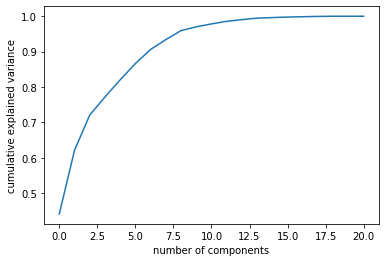

In [86]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [87]:
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(principalDf, y)

In [89]:
lm = LinearRegression()
lm.fit(X_train, y_train)

pred = lm.predict(X_test)
metrics.r2_score(pred, y_test)

0.7209139614131417

In [90]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train.values.reshape(-1,1), X2)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     6176.
Date:                Wed, 17 Jun 2020   Prob (F-statistic):               0.00
Time:                        18:10:50   Log-Likelihood:            -1.2946e+05
No. Observations:               10722   AIC:                         2.589e+05
Df Residuals:                   10715   BIC:                         2.590e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.198e+04    409.830     78.022      0.0

In [91]:
for i,x in enumerate(pca.components_):
    print("Feature " + str(i))
    top = x.argsort()[-5:][::-1]
    table = [list(modelling.drop(["demand_F1"], axis = 1).columns[top]), x[top]]
    df = pd.DataFrame(np.transpose(table))
    print(df)

Feature 0
                    0                    1
0   sentiment_neutral  0.30884610830129955
1          nb_reviews  0.30710470427318187
2  sentiment_positive   0.3044803899986362
3  sentiment_negative   0.3011745346855408
4            rating_5  0.29857234018848017
Feature 1
                    0                    1
0            rating_3  0.21762330130090707
1            rating_4   0.2116702716548979
2  sentiment_negative  0.17621825487141296
3          nb_reviews   0.1556125499306655
4  sentiment_positive  0.15337572516193698
Feature 2
                  0                     1
0   avg_year_demand    0.6699277829767241
1             month    0.2804914266782641
2  avg_brand_demand   0.07620781595565053
3            demand    0.0406712657184051
4         demand_P1  0.033436205245700776
Feature 3
                  0                    1
0  avg_month_demand   0.7575187109907038
1  avg_brand_demand   0.2524914210791074
2         demand_P2  0.12538779468939137
3         demand_P1  0.09511